In [2]:
# interp_metrics
# Purpose: calculate interpretability metrics 
#         including bar plots, QQ plots, Shapiro-Wilks, 
#         and Wilcoxon rank test
# Last Mod: Jun 7, 2022
# Ashley Mae Conard
# Resources: https://towardsdatascience.com/rbo-v-s-kendall-tau-to-compare-ranked-lists-of-items-8776c5182899
#            https://www.datasklr.com/ols-least-squares-regression/scaling-centering-and-standardization#:~:text=Luckily%2C%20centering%20or%20scaling%20does,scaling%20did%20not%20take%20place.

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics, math, matplotlib
import seaborn as sns
from itertools import combinations

In [3]:
# Directories
main_dir = "/nbu/compbio/aconard/microsoft_research_collab/results/t1d_results/"

## SCHD
file_schd = main_dir+"schd_res/schd_metrics.csv"

## BANNs
file_banns = main_dir+"banns_res/pathway_level/banns_snp_set_1.csv"

## Logistic Regression
lr_dir = "/nbu/compbio/aconard/microsoft_research_collab/results/t1d_results_gsea/gsea_table/lr/pathway_level_data_snps72819/"

## Random Forest
rf_dir = "/nbu/compbio/aconard/microsoft_research_collab/results/t1d_results_gsea/gsea_table/rf/pathway_level_data_snps72819/"

# GO = Log. Reg. 
# KEGG = R.F.

In [4]:
# Upload files
## SCHD
df_schd = pd.read_csv(file_schd, sep=",", index_col=0)

## get list all pathways
list_pathways = df_schd.index.tolist()

## BANNs
df_banns = pd.read_csv(file_banns, sep=" ", index_col=0)

## LR
df_strong_go15k = pd.read_csv(lr_dir+"/GSEA_s0_ord_enrichmentScore_strong_coefs_15k.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_strong_go15k.index = df_strong_go15k["Description"]
df_strong_go15k = df_strong_go15k.drop(columns=["Description"])

df_strong_go = pd.read_csv(lr_dir+"/GSEA_s0_ord_enrichmentScore_strong_coefs.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_strong_go.index = df_strong_go["Description"]
df_strong_go = df_strong_go.drop(columns=["Description"])

df_weak_go15k = pd.read_csv(lr_dir+"/GSEA_s0_ord_enrichmentScore_weak_coefs_15k.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_weak_go15k.index = df_weak_go15k["Description"]
df_weak_go15k = df_weak_go15k.drop(columns=["Description"])

df_weak_go = pd.read_csv(lr_dir+"/GSEA_s0_ord_enrichmentScore_weak_coefs.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_weak_go.index = df_weak_go["Description"]
df_weak_go = df_weak_go.drop(columns=["Description"])

df_strong_kegg15k = pd.read_csv(rf_dir+"/GSEA_s0_ord_enrichmentScore_feature_importances_15k.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_strong_kegg15k.index = df_strong_kegg15k["Description"]
df_strong_kegg15k = df_strong_kegg15k.drop(columns=["Description"])

df_strong_kegg = pd.read_csv(rf_dir+"/GSEA_s0_ord_enrichmentScore_feature_importances.csv")[["Description", "qvalues"]].sort_values(by=['qvalues'])
df_strong_kegg.index = df_strong_kegg["Description"]
df_strong_kegg = df_strong_kegg.drop(columns=["Description"])

#df_lr15 = pd.read_csv(file_lr15k, sep=" ", index_col=0)
#df_lr = pd.read_csv(file_lr, sep=" ", index_col=0)

In [5]:
# Inputs
list_method_names = ['SCHD_pns','SCHD_ns','SCHD_pni','SCHD_ni',
                     'BANNs',
                     'LR_strong_15k', 'LR_strong', 
                     'LR_weak_15k', 'LR_weak',
                     'RF_strong_15k', 'RF_strong']

l_schd_pns = df_schd.sort_values(by=['pval_ns']).index.tolist()
v_schd_pns = df_schd.sort_values(by=['pval_ns'])['pval_ns'].tolist()

l_schd_ns = df_schd.sort_values(by=['score_ns'], ascending=False).index.tolist()
v_schd_ns = df_schd.sort_values(by=['score_ns'], ascending=False)['score_ns'].tolist()

l_schd_pni = df_schd.sort_values(by=['pval_ni']).index.tolist()
v_schd_pni = df_schd.sort_values(by=['pval_ni'])['pval_ni'].tolist()

l_schd_ni = df_schd.sort_values(by=['score_ni'], ascending=False).index.tolist()
v_schd_ni = df_schd.sort_values(by=['score_ni'], ascending=False)['score_ni'].tolist()


## BANNs
l_banns = df_banns.index.tolist()
v_banns = df_banns['pip'].tolist()


# LR
qval="qvalues"

l_lr_strong_go15k = df_strong_go15k.index.tolist()[0:len(v_schd_pns)]
v_lr_strong_go15k = df_strong_go15k[qval].tolist()[0:len(v_schd_pns)]

l_lr_strong_go = df_strong_go.index.tolist()[0:len(v_schd_pns)]
v_lr_strong_go = df_strong_go[qval].tolist()[0:len(v_schd_pns)]

l_lr_weak_go15k = df_weak_go15k.index.tolist()[0:len(v_schd_pns)]
v_lr_weak_go15k = df_weak_go15k[qval].tolist()[0:len(v_schd_pns)]

l_lr_weak_go = df_weak_go.index.tolist()[0:len(v_schd_pns)]
v_lr_weak_go = df_weak_go[qval].tolist()[0:len(v_schd_pns)]

# RF
l_lr_strong_kegg15k = df_strong_kegg15k.index.tolist()[0:len(v_schd_pns)]
v_lr_strong_kegg15k = df_strong_kegg15k[qval].tolist()[0:len(v_schd_pns)]

l_lr_strong_kegg = df_strong_kegg.index.tolist()[0:len(v_schd_pns)]
v_lr_strong_kegg = df_strong_kegg[qval].tolist()[0:len(v_schd_pns)]

pathway_name_lists = [l_schd_pns,l_schd_ns,l_schd_pni,l_schd_ni,
                      l_banns,
                      l_lr_strong_go15k, l_lr_strong_go, 
                      l_lr_weak_go15k, l_lr_weak_go,
                      l_lr_strong_kegg15k, l_lr_strong_kegg]

In [9]:
# Shorten lists for Kendall Tau and plotting ranks
# TODO: should this be done?

len_shortest_list = min(map(len, pathway_name_lists))

pathway_name_lists

[['REACTOME_TRANSPORT_OF_FATTY_ACIDS',
  'BIOCARTA_STATHMIN_PATHWAY',
  'BIOCARTA_RECK_PATHWAY',
  'KEGG_LEISHMANIA_INFECTION',
  'REACTOME_PROTEIN_METHYLATION',
  'SA_PROGRAMMED_CELL_DEATH',
  'REACTOME_PHASE_3_RAPID_REPOLARISATION',
  'BIOCARTA_INFLAM_PATHWAY',
  'REACTOME_PRE_NOTCH_PROCESSING_IN_THE_ENDOPLASMIC_RETICULUM',
  'REACTOME_INTERLEUKIN_36_PATHWAY',
  'BIOCARTA_MHC_PATHWAY',
  'REACTOME_VLDLR_INTERNALISATION_AND_DEGRADATION',
  'REACTOME_SYNTHESIS_OF_PG',
  'REACTOME_RRNA_MODIFICATION_IN_THE_MITOCHONDRION',
  'REACTOME_MET_RECEPTOR_RECYCLING',
  'REACTOME_REACTIONS_SPECIFIC_TO_THE_COMPLEX_N_GLYCAN_SYNTHESIS_PATHWAY',
  'BIOCARTA_CB1R_PATHWAY',
  'REACTOME_BETA_OXIDATION_OF_VERY_LONG_CHAIN_FATTY_ACIDS',
  'REACTOME_DIGESTION',
  'BIOCARTA_PDZS_PATHWAY',
  'REACTOME_BUTYROPHILIN_BTN_FAMILY_INTERACTIONS',
  'REACTOME_CHAPERONE_MEDIATED_AUTOPHAGY',
  'REACTOME_NECTIN_NECL_TRANS_HETERODIMERIZATION',
  'BIOCARTA_RAB_PATHWAY',
  'REACTOME_GAP_JUNCTION_DEGRADATION',
  'REACTOME_YA

In [10]:
# Utility functions
def center_scale(l):
    cs_l = []
    for val in l:
        cs_l.append((val - statistics.mean(l))/statistics.pstdev(l))
    return(cs_l)

def qq_plot(l, method):
    stats.probplot(l, dist="norm", plot=plt)
    plt.title("%s Method Q-Q Plot"%(method))
    print("Shapiro-Wilk test for normality (W-test,p-val):", stats.shapiro(l))
    plt.show()
    
def calc_KT(la, lb):
    # tau = (P - Q) / sqrt((P + Q + T) * (P + Q + U)) 
    return(stats.kendalltau(la, lb))

In [11]:
# THIS WILL ERROR UNTIL THE LISTS ARE THE SAME LENGTH

# df_vals = pd.DataFrame({'v_schd_pns':v_schd_pns,'v_schd_ns':v_schd_ns, # SCHD node score
#                         'v_schd_pni':v_schd_pni,'v_schd_ni':v_schd_ni, # SCHD node impact
#                         'v_banns':v_banns, # BANNs
#                         'v_lr_strong_15k':v_lr_strong_go15k, 'v_lr_strong':v_lr_strong_go,
#                         'v_lr_weak':v_lr_weak_go15k, 'v_lr_weak':v_lr_weak_go, 
#                         'v_rf_strong_15k':v_lr_strong_kegg15k, 'v_rf_strong':v_lr_strong_kegg}) # LR

# # Plot ranks
# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
 
# # Creating plot
# # bp = ax.boxplot(cs_lists)

# sns.histplot(data=df_vals, element="poly", alpha=.1) # fill=False

# #sns.violinplot(data=df_vals)
# #sns.swarmplot(data=df_vals)

# # plt.xticks([1, 2, 3], list_method_names)
# # ax.set_title('Centered and Scaled Method Ranks')
# # ax.set_xlabel('lists')
# ax.set_ylim(-2,100)
# # ax.set_ylabel('centered and scaled ranks')

# Centered and scaled ranks

In [12]:
# Center and scale
cs_v_schd_pns = center_scale(v_schd_pns)
cs_v_schd_ns = center_scale(v_schd_ns)
cs_v_schd_pni = center_scale(v_schd_pni)
cs_v_schd_ni = center_scale(v_schd_ni)
cs_v_banns = center_scale(v_banns)
#cs_v_lr15 = center_scale(v_lr15)
#cs_v_lr = center_scale(v_lr)

cs_v_lists = [cs_v_schd_pns, cs_v_schd_ns, cs_v_schd_pni, cs_v_schd_ni,cs_v_banns]

# QQ plots and use Shapiro-Wilk test to check for normality

Shapiro-Wilk test for normality (W-test,p-val): ShapiroResult(statistic=0.914201021194458, pvalue=1.4986167068890841e-21)


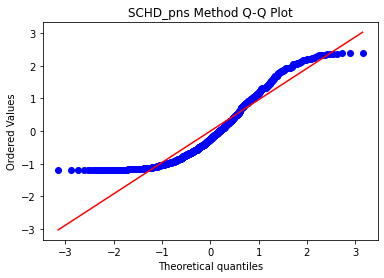

Shapiro-Wilk test for normality (W-test,p-val): ShapiroResult(statistic=0.04381763935089111, pvalue=0.0)


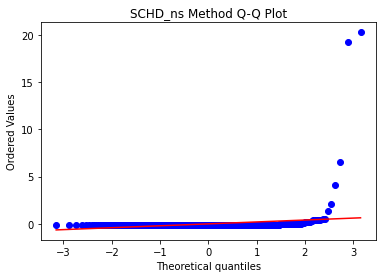

Shapiro-Wilk test for normality (W-test,p-val): ShapiroResult(statistic=0.9462483525276184, pvalue=4.691174187848715e-17)


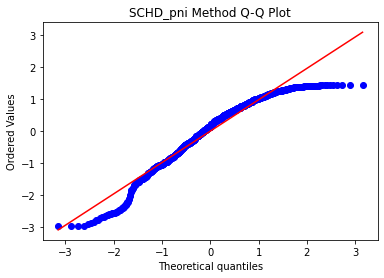

Shapiro-Wilk test for normality (W-test,p-val): ShapiroResult(statistic=0.2412133812904358, pvalue=0.0)


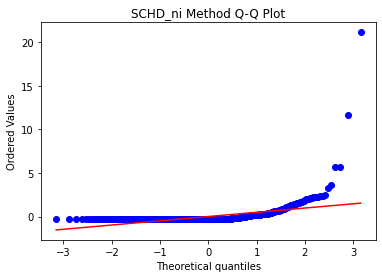

Shapiro-Wilk test for normality (W-test,p-val): ShapiroResult(statistic=0.058094680309295654, pvalue=0.0)


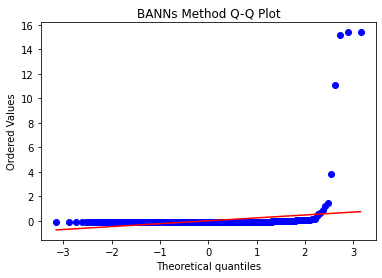

In [13]:
# Calculate QQ plots and use Shapiro-Wilk test to check for normality
for i, mn in zip(cs_v_lists, list_method_names): 
    qq_plot(i, mn)

# Kendall Tau test

In [15]:
# THIS WILL ERROR UNTIL THE LISTS ARE THE SAME LENGTH

# Perform Kendall Tau test
# max and min are +1 and -1
# +1 denotes perfect agreement
# -1 denotes complete disagreement
# A value 0 means: no correlation between rankings

list_pairs = list(combinations(pathway_name_lists, 2))
list_pair_names = list(combinations(list_method_names, 2))

for pairs,mn in zip(list_pairs, list_pair_names):
    print(mn, calc_KT(pairs[0],pairs[1]))

('SCHD_pns', 'SCHD_ns') KendalltauResult(correlation=0.0008090748476792763, pvalue=0.9717828095761981)
('SCHD_pns', 'SCHD_pni') KendalltauResult(correlation=0.03653495808772133, pvalue=0.11020074629641691)
('SCHD_pns', 'SCHD_ni') KendalltauResult(correlation=0.02028741420779464, pvalue=0.3751023861301682)
('SCHD_pns', 'BANNs') KendalltauResult(correlation=-0.030744844211812495, pvalue=0.17889976080986625)


ValueError: All inputs to `kendalltau` must be of the same size, found x-size 853 and y-size 612

# Ranked search terms

In [16]:
# Resources: https://www.webmd.com/diabetes/diabetes-glossary-terms
#            https://www.endocrineweb.com/conditions/diabetes/diabetes-glossary
#            GOOGLED "Canonical pathways CP Msigdb diabetes" and used words where 
#                    descriptor/definition had diabetes in the name

# NOTE: CHREBP IS LINKED WITH TYEP 2 DIABETES
list_terms = ["AUTOANTIBODY", "AUTOIMMUNE", "IMMUNE", "DIABETES", "INSULIN-DEPENDENT", 
              "JUVENILE-ONSET", "TYPE_1", "BASAL", "BOLUS", "INSULIN", "ENDOCRINE",
             "AMPK", "PPAR", "RAS", "MEK", "ERK", "LEPTIN", "CHREBP", "PGC1A", 
              "PANCREATIC"] 

df_search_term_rank = pd.DataFrame(float('nan'), index=list_terms, columns=list_method_names)

for term in list_terms:    
    print(term)
    for method_name, rank in zip(list_method_names, pathway_name_lists):
        print(" ",method_name)
        #index = [idx for idx, s in enumerate(rank) if term in s][0]
        found=0
        for idx, s in enumerate(rank):
            #print(idx, s)
            if (term in s or term.lower() in s) and found==0:
                found=1
                print("  ", method_name, idx)
                df_search_term_rank[method_name][term] = idx

AUTOANTIBODY
  SCHD_pns
  SCHD_ns
  SCHD_pni
  SCHD_ni
  BANNs
  LR_strong_15k
  LR_strong
  LR_weak_15k
  LR_weak
  RF_strong_15k
  RF_strong
AUTOIMMUNE
  SCHD_pns
  SCHD_ns
  SCHD_pni
  SCHD_ni
  BANNs
  LR_strong_15k
  LR_strong
  LR_weak_15k
  LR_weak
  RF_strong_15k
  RF_strong
IMMUNE
  SCHD_pns
   SCHD_pns 460
  SCHD_ns
   SCHD_ns 139
  SCHD_pni
   SCHD_pni 613
  SCHD_ni
   SCHD_ni 289
  BANNs
   BANNs 133
  LR_strong_15k
   LR_strong_15k 70
  LR_strong
   LR_strong 46
  LR_weak_15k
   LR_weak_15k 59
  LR_weak
   LR_weak 12
  RF_strong_15k
   RF_strong_15k 175
  RF_strong
   RF_strong 2
DIABETES
  SCHD_pns
  SCHD_ns
  SCHD_pni
  SCHD_ni
  BANNs
  LR_strong_15k
  LR_strong
  LR_weak_15k
  LR_weak
  RF_strong_15k
  RF_strong
INSULIN-DEPENDENT
  SCHD_pns
  SCHD_ns
  SCHD_pni
  SCHD_ni
  BANNs
  LR_strong_15k
  LR_strong
  LR_weak_15k
  LR_weak
  RF_strong_15k
  RF_strong
JUVENILE-ONSET
  SCHD_pns
  SCHD_ns
  SCHD_pni
  SCHD_ni
  BANNs
  LR_strong_15k
  LR_strong
  LR_weak_15k
  LR_w

In [17]:
df_search_term_rank=df_search_term_rank.dropna(axis=1, how='all')

In [18]:
#center_scale(df_search_term_rank["SCHD"])
df_search_term_rank_cent_scaled = df_search_term_rank.apply(center_scale, axis=0)

In [19]:
# Format for plotting
max_rank = df_search_term_rank.max().max()+10
df_search_term_rank['term'] = df_search_term_rank.index

# Creating df without LR as using different pathways alltogether
df_search_term_rank_NO_LR = df_search_term_rank.loc[:,~df_search_term_rank.columns.str.startswith('LR')]

# Reformatting counts to plot
df_search_term_rank_reformatted = df_search_term_rank.melt(id_vars = 'term').dropna()
df_search_term_rank_NO_LR_reformatted = df_search_term_rank_NO_LR.melt(id_vars = 'term').dropna()

In [20]:
# all non-NA terms
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_search_term_rank_reformatted)
    

           term       variable  value
2        IMMUNE       SCHD_pns  460.0
9       INSULIN       SCHD_pns  312.0
11         AMPK       SCHD_pns   35.0
12         PPAR       SCHD_pns   81.0
13          RAS       SCHD_pns   36.0
15          ERK       SCHD_pns  286.0
16       LEPTIN       SCHD_pns  341.0
17       CHREBP       SCHD_pns   35.0
18        PGC1A       SCHD_pns  132.0
19   PANCREATIC       SCHD_pns   83.0
22       IMMUNE        SCHD_ns  139.0
29      INSULIN        SCHD_ns  144.0
31         AMPK        SCHD_ns  775.0
32         PPAR        SCHD_ns  272.0
33          RAS        SCHD_ns  221.0
35          ERK        SCHD_ns   79.0
36       LEPTIN        SCHD_ns  109.0
37       CHREBP        SCHD_ns  143.0
38        PGC1A        SCHD_ns  516.0
39   PANCREATIC        SCHD_ns  757.0
42       IMMUNE       SCHD_pni  613.0
49      INSULIN       SCHD_pni  503.0
51         AMPK       SCHD_pni  320.0
52         PPAR       SCHD_pni  263.0
53          RAS       SCHD_pni  325.0
55          

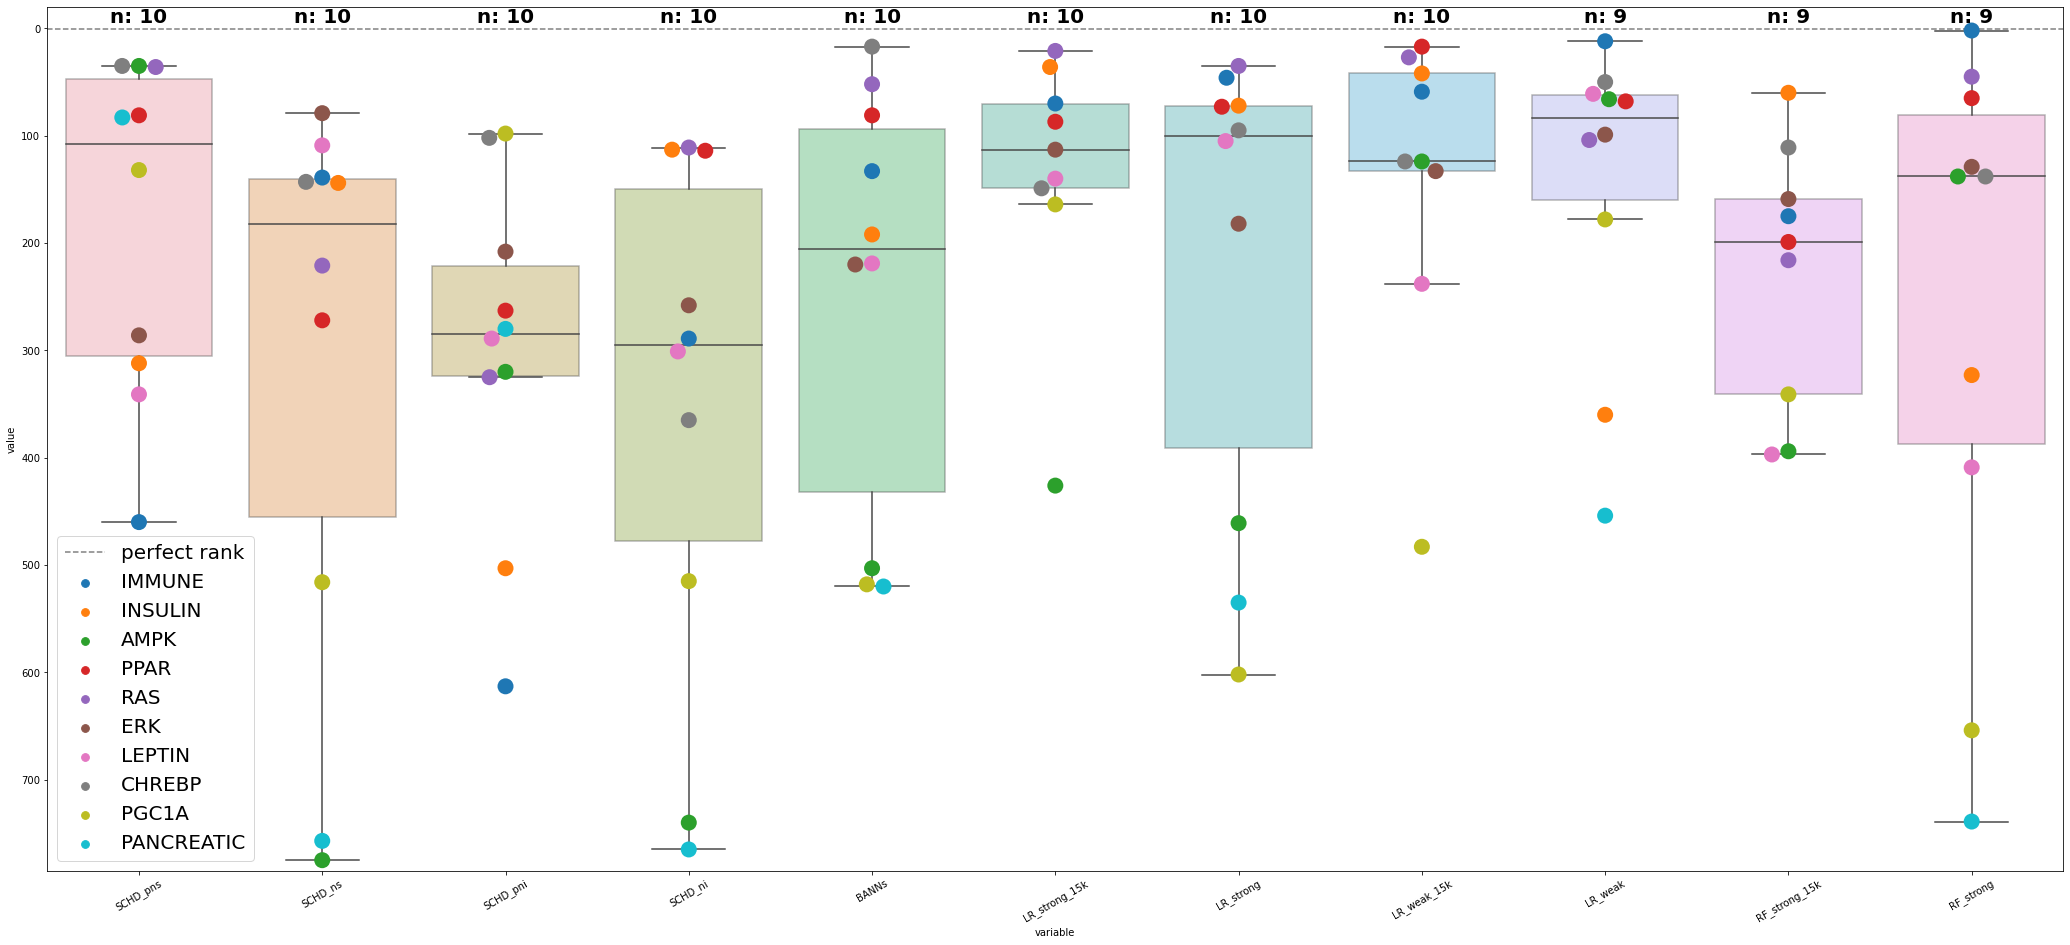

In [21]:
# Plot centered and scaled ranks
fig = plt.figure(figsize =(28, 12))
ax = fig.add_axes([0, 0, 1, 1])
matplotlib.rcParams.update({'font.size': 20})

# plt.xticks([1, 2, 3], list_method_names)
# ax.set_title('Centered and Scaled Method Ranks')
# ax.set_xlabel('lists')
#ax.set_ylim(-2,100)
# ax.set_ylabel('centered and scaled ranks')

ypoints = 0.2
plt.axhline(ypoints, 0, 1, label='perfect rank', color='grey', linestyle='dashed')

sns.boxplot(data=df_search_term_rank, boxprops=dict(alpha=.4))
sns.swarmplot(data=df_search_term_rank_reformatted, x="variable",y="value", size=16, hue="term", edgecolors='b')

plt.legend(loc='lower left')
plt.ylim(math.ceil(max_rank), -20)
plt.xticks(rotation=30)

# Calculate number of obs per group & median to position labels
medians = df_search_term_rank_reformatted.groupby(['variable'])['value'].median().values# df.groupby(['species'])['sepal_length'].median().values
nobs = df_search_term_rank_reformatted['variable'].value_counts().values # df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            -5,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='bold')
    
# for i, language in enumerate (languages):
#     plt.text(avg_salary[i]+0.2, candidates[i]+0.2, language)

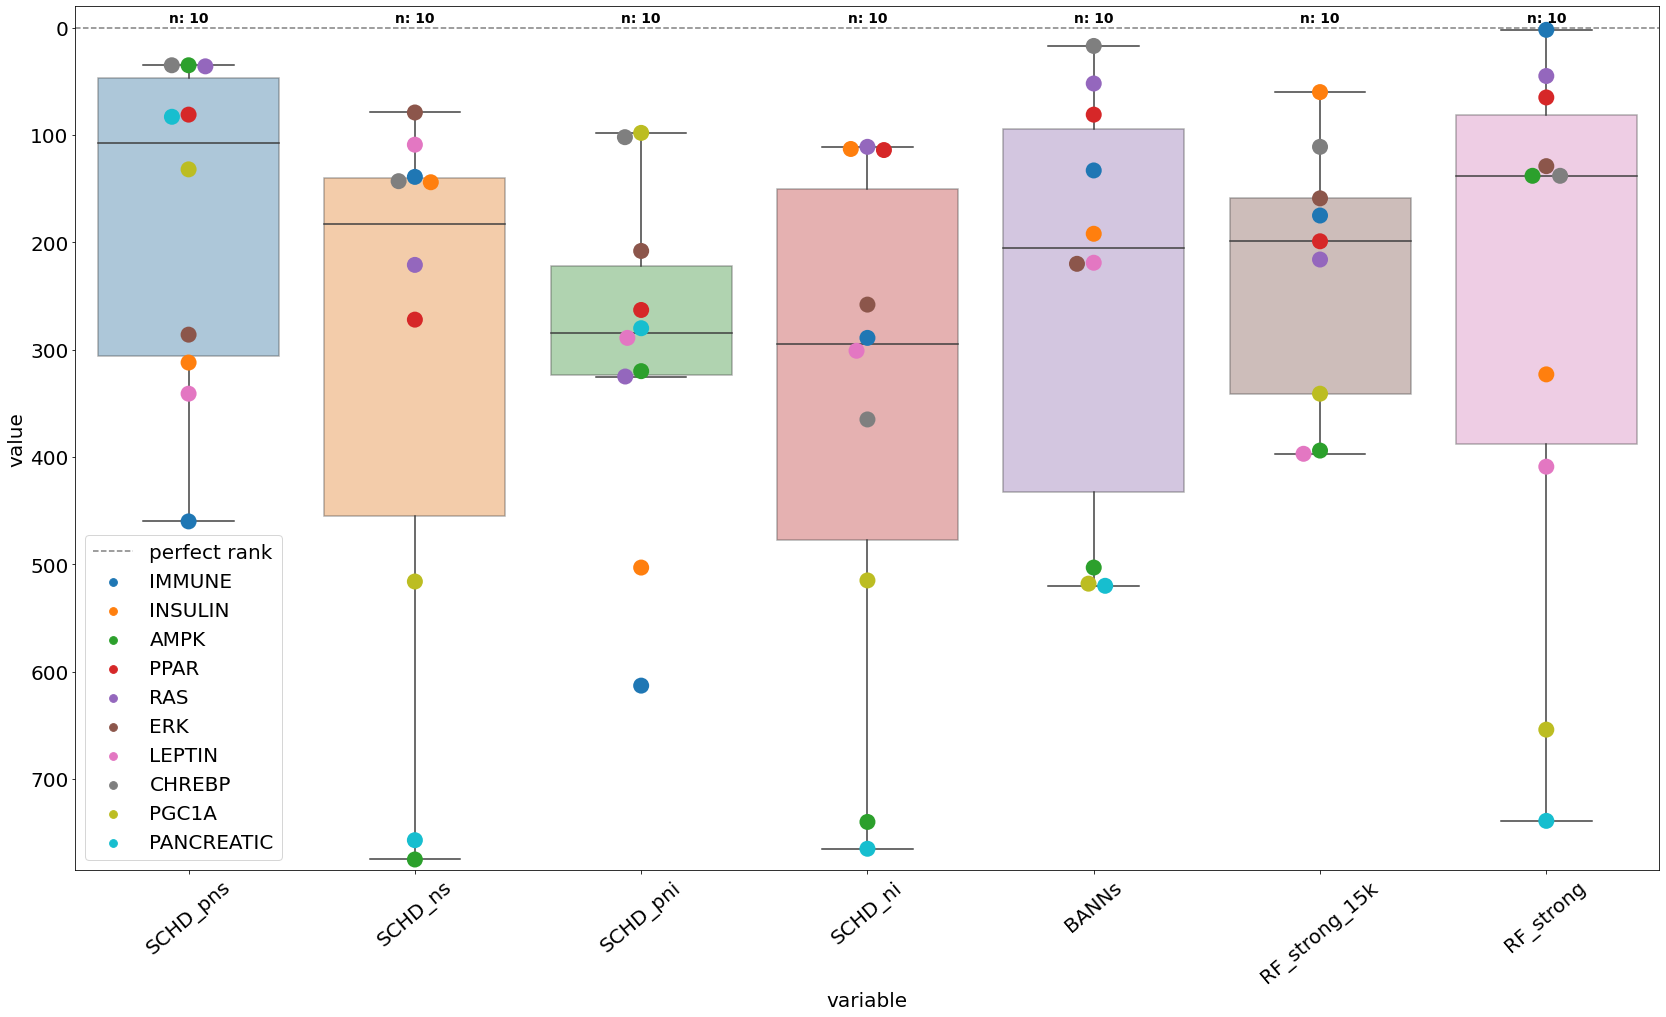

In [23]:
# Plot centered and scaled ranks
fig = plt.figure(figsize =(22, 12))
ax = fig.add_axes([0, 0, 1, 1])
matplotlib.rcParams.update({'font.size': 20})

# plt.xticks([1, 2, 3], list_method_names)
# ax.set_title('Centered and Scaled Method Ranks')
# ax.set_xlabel('lists')
#ax.set_ylim(-2,100)
# ax.set_ylabel('centered and scaled ranks')

ypoints = 0.2
plt.axhline(ypoints, 0, 1, label='perfect rank', color='grey', linestyle='dashed')

sns.boxplot(data=df_search_term_rank_NO_LR, boxprops=dict(alpha=.4))
sns.swarmplot(data=df_search_term_rank_NO_LR_reformatted, x="variable",y="value", size=16, hue="term", edgecolors='b')

plt.legend(loc='lower left')
plt.ylim(math.ceil(max_rank), -20)
plt.xticks(rotation=40)

# Calculate number of obs per group & median to position labels
medians = df_search_term_rank_reformatted.groupby(['variable'])['value'].median().values# df.groupby(['species'])['sepal_length'].median().values
nobs = df_search_term_rank_reformatted['variable'].value_counts().values # df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            -5,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black',
            weight='bold')
    
# for i, language in enumerate (languages):
#     plt.text(avg_salary[i]+0.2, candidates[i]+0.2, language)

In [20]:
# hyperg.

# ties - biology redundancy

# model and interpretability